<a href="https://colab.research.google.com/github/SachinBiswas7/Breast-Cancer-Classification/blob/main/Breast_cancer_classification_using_Neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv("main.csv",index_col=32)

In [ ]:
print(df.describe().T)

                         count          mean           std          min  \
id                       569.0  3.037183e+07  1.250206e+08  8670.000000   
radius_mean              569.0  1.412729e+01  3.524049e+00     6.981000   
texture_mean             569.0  1.928965e+01  4.301036e+00     9.710000   
perimeter_mean           569.0  9.196903e+01  2.429898e+01    43.790000   
area_mean                569.0  6.548891e+02  3.519141e+02   143.500000   
smoothness_mean          569.0  9.636028e-02  1.406413e-02     0.052630   
compactness_mean         569.0  1.043410e-01  5.281276e-02     0.019380   
concavity_mean           569.0  8.879932e-02  7.971981e-02     0.000000   
concave points_mean      569.0  4.891915e-02  3.880284e-02     0.000000   
symmetry_mean            569.0  1.811619e-01  2.741428e-02     0.106000   
fractal_dimension_mean   569.0  6.279761e-02  7.060363e-03     0.049960   
radius_se                569.0  4.051721e-01  2.773127e-01     0.111500   
texture_se               

In [ ]:
print(df.isnull().sum())
#df = df.dropna()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [ ]:
# Rename 'Diagnosis' column to 'Label'
df['Label'] = df['diagnosis']
df = df.drop(columns=['diagnosis'])

# Print data types of columns
print(df.dtypes)


id                           int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

<Axes: xlabel='Label', ylabel='count'>

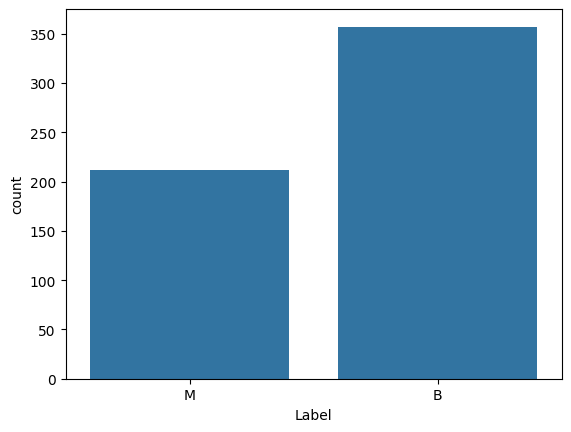

In [ ]:
#Understand the data
sns.countplot(x="Label", data=df) #M - malignant   B - benign

In [ ]:
####### Replace categorical values with numbers########
print("Distribution of data: ", df['Label'].value_counts())

#Define the dependent variable that needs to be predicted (labels)
y = df["Label"].values
print("Labels before encoding are: ", np.unique(y))

# Encoding categorical data from text (B and M) to integers (0 and 1)
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
Y = labelencoder.fit_transform(y) # M=1 and B=0
print("Labels after encoding are: ", np.unique(Y))

Distribution of data:  Label
B    357
M    212
Name: count, dtype: int64
Labels before encoding are:  ['B' 'M']
Labels after encoding are:  [0 1]


In [ ]:
#Define x and normalize / scale values

#Define the independent variables. Drop label and ID, and normalize other data
X = df.drop(labels = ["Label", "id"], axis=1)
print(X.describe().T) #Needs scaling

                         count        mean         std         min  \
radius_mean              569.0   14.127292    3.524049    6.981000   
texture_mean             569.0   19.289649    4.301036    9.710000   
perimeter_mean           569.0   91.969033   24.298981   43.790000   
area_mean                569.0  654.889104  351.914129  143.500000   
smoothness_mean          569.0    0.096360    0.014064    0.052630   
compactness_mean         569.0    0.104341    0.052813    0.019380   
concavity_mean           569.0    0.088799    0.079720    0.000000   
concave points_mean      569.0    0.048919    0.038803    0.000000   
symmetry_mean            569.0    0.181162    0.027414    0.106000   
fractal_dimension_mean   569.0    0.062798    0.007060    0.049960   
radius_se                569.0    0.405172    0.277313    0.111500   
texture_se               569.0    1.216853    0.551648    0.360200   
perimeter_se             569.0    2.866059    2.021855    0.757000   
area_se             

In [ ]:
#Scale / normalize the values to bring them to similar range
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)
print(X)  #Scaled values

[[0.52103744 0.0226581  0.54598853 ... 0.91202749 0.59846245 0.41886396]
 [0.64314449 0.27257355 0.61578329 ... 0.63917526 0.23358959 0.22287813]
 [0.60149557 0.3902604  0.59574321 ... 0.83505155 0.40370589 0.21343303]
 ...
 [0.45525108 0.62123774 0.44578813 ... 0.48728522 0.12872068 0.1519087 ]
 [0.64456434 0.66351031 0.66553797 ... 0.91065292 0.49714173 0.45231536]
 [0.03686876 0.50152181 0.02853984 ... 0.         0.25744136 0.10068215]]


In [ ]:
#Split data into train and test to verify accuracy after fitting the model.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
print("Shape of training data is: ", X_train.shape)
print("Shape of testing data is: ", X_test.shape)

Shape of training data is:  (426, 30)
Shape of testing data is:  (143, 30)


In [ ]:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [35]:
def models(X_train,y_train):

  #Using Logistic Regression Algorithm to the Training Set
    from sklearn.linear_model import LogisticRegression
    log=LogisticRegression(random_state = 0)
    log.fit(X_train, y_train)

  #Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
    from sklearn.neighbors import KNeighborsClassifier
    knn=KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
    knn.fit(X_train, y_train)

  #Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    tree.fit(X_train, y_train)

 #Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm
    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB()
    gauss.fit(X_train, y_train)

#Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
    forest.fit(X_train, y_train)
#Using SVC method of svm class to use Support Vector Machine Algorithm
    from sklearn.svm import SVC
    svc_lin = SVC(kernel = 'linear', random_state = 0)
    svc_lin.fit(X_train, y_train)


  #print model accuracy on the training data.
    print('[0]Logistic Regression Training Accuracy:', log.score(X_train, y_train))
    print('[1]K Nearest Neighbor Training Accuracy:', knn.score(X_train, y_train))
    print('[2]Decision Tree Classifier Training Accuracy:', tree.score(X_train, y_train))
    print('[3]Gaussian Naive Bayes Training Accuracy:', gauss.score(X_train, y_train))
    print('[4]Random Forest Classifier Training Accuracy:', forest.score(X_train, y_train))
    print('[5]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(X_train, y_train))


    return log, knn,tree,gauss, forest,svc_lin
mdl = models(X_train,y_train)
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

[0]Logistic Regression Training Accuracy: 0.9859154929577465
[1]K Nearest Neighbor Training Accuracy: 0.9788732394366197
[2]Decision Tree Classifier Training Accuracy: 1.0
[3]Gaussian Naive Bayes Training Accuracy: 0.9366197183098591
[4]Random Forest Classifier Training Accuracy: 0.9976525821596244
[5]Support Vector Machine (Linear Classifier) Training Accuracy: 0.9929577464788732


[[87  2]
 [ 1 53]]
Model[0] Testing Accuracy = "0.9790209790209791!"



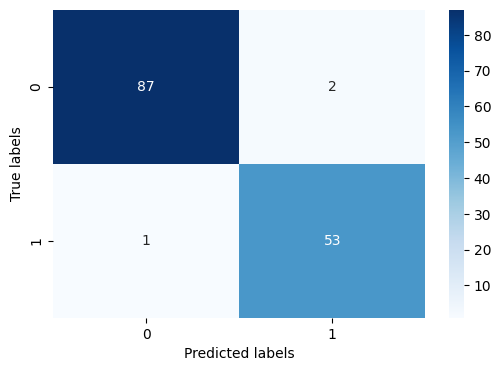

[[86  3]
 [ 3 51]]
Model[1] Testing Accuracy = "0.958041958041958!"



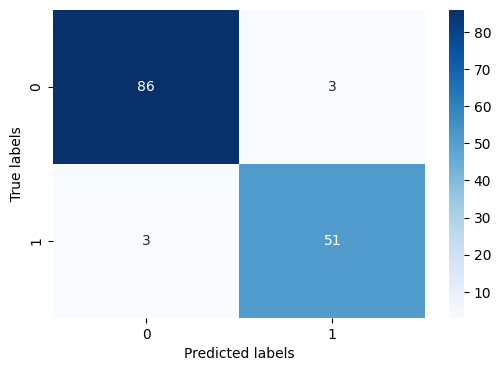

[[87  2]
 [ 4 50]]
Model[2] Testing Accuracy = "0.958041958041958!"



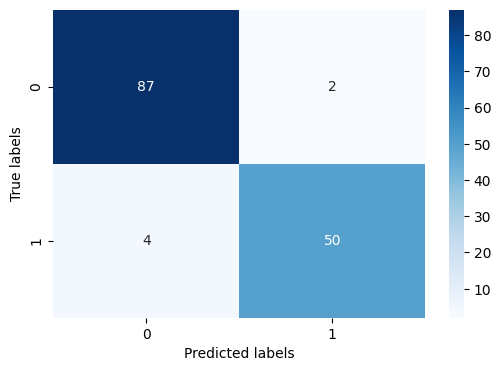

[[85  4]
 [ 3 51]]
Model[3] Testing Accuracy = "0.951048951048951!"



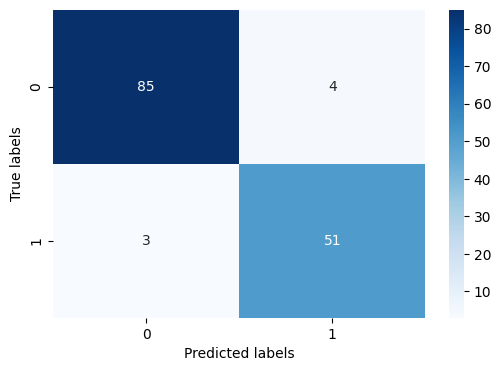

[[88  1]
 [ 3 51]]
Model[4] Testing Accuracy = "0.972027972027972!"



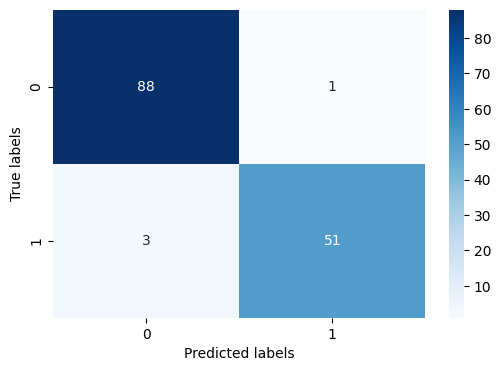

[[87  2]
 [ 2 52]]
Model[5] Testing Accuracy = "0.972027972027972!"



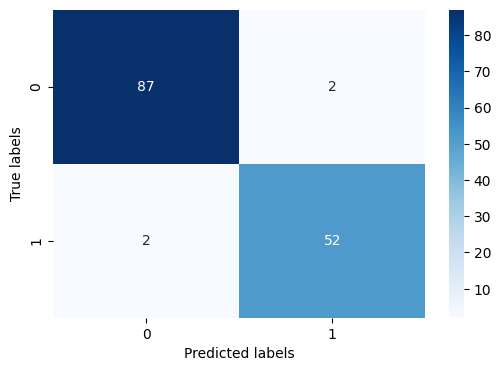

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Loop through each model
for i, mdl in enumerate(mdl):
    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, mdl.predict(X_test))

    TN = cm[0][0]
    TP = cm[1][1]
    FN = cm[1][0]
    FP = cm[0][1]

    print(cm)
    print('Model[{}] Testing Accuracy = "{}!"'.format(i, (TP + TN) / (TP + TN + FN + FP)))
    print()  # Print a new line

    # Plot the heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

In [ ]:
model = Sequential()
model.add(Dense(14, input_dim=30, activation='relu'))
model.add(Dropout(0.35))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                434       
                                                                 
 dropout (Dropout)           (None, 14)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 15        
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 449 (1.75 KB)
Trainable params: 449 (1.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
#Fit with no early stopping or other callbacks
history = model.fit(X_train, y_train, verbose=1, epochs=100, batch_size=40,
                    validation_data=(X_test, y_test))


Epoch 1/100
11/11 [==============================] - 8s 48ms/step - loss: 0.5818 - accuracy: 0.6925 - val_loss: 0.4461 - val_accuracy: 0.8601
Epoch 2/100
11/11 [==============================] - 0s 20ms/step - loss: 0.4850 - accuracy: 0.8169 - val_loss: 0.3703 - val_accuracy: 0.9091
Epoch 3/100
11/11 [==============================] - 0s 13ms/step - loss: 0.4247 - accuracy: 0.8333 - val_loss: 0.3124 - val_accuracy: 0.9161
Epoch 4/100
11/11 [==============================] - 0s 21ms/step - loss: 0.3796 - accuracy: 0.8545 - val_loss: 0.2697 - val_accuracy: 0.9441
Epoch 5/100
11/11 [==============================] - 0s 10ms/step - loss: 0.3412 - accuracy: 0.8826 - val_loss: 0.2378 - val_accuracy: 0.9441
Epoch 6/100
11/11 [==============================] - 0s 11ms/step - loss: 0.2950 - accuracy: 0.9155 - val_loss: 0.2122 - val_accuracy: 0.9441
Epoch 7/100
11/11 [==============================] - 0s 11ms/step - loss: 0.2867 - accuracy: 0.9014 - val_loss: 0.1909 - val_accuracy: 0.9510
Epoch 

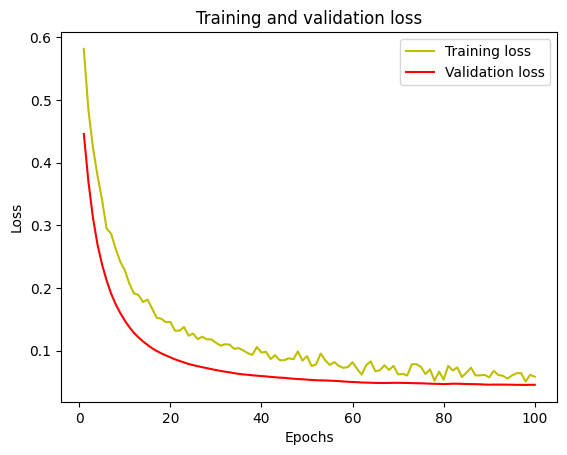

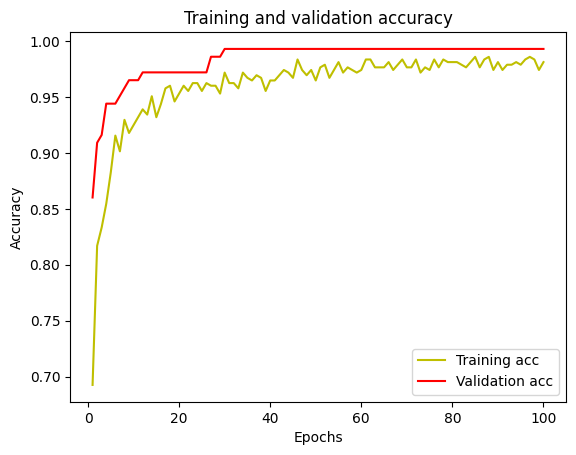

In [ ]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['accuracy']  #Use accuracy if acc doesn't work
val_acc = history.history['val_accuracy']  #Use val_accuracy if acc doesn't work
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

5/5 [==============================] - 0s 10ms/step
Accuracy: 0.99
Precision: 1.00
Recall: 0.98
F1 Score: 0.99


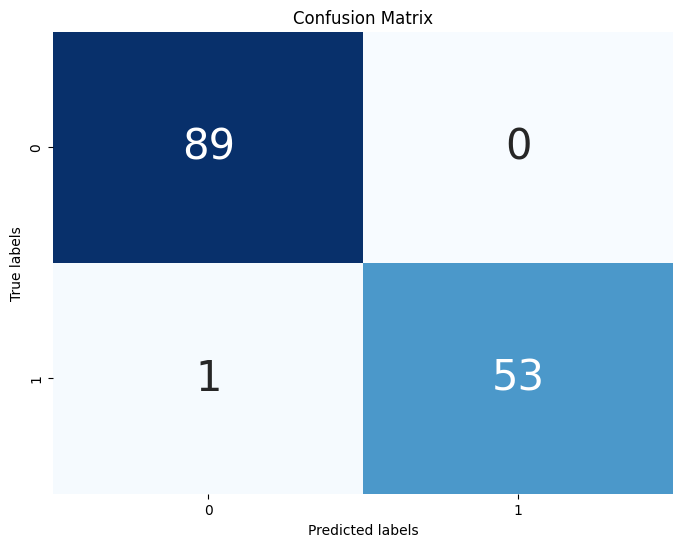

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Predicting the Test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Calculating additional metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Printing the metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

# Plotting the Confusion Matrix as a heatmap with larger annotations
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 30})
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


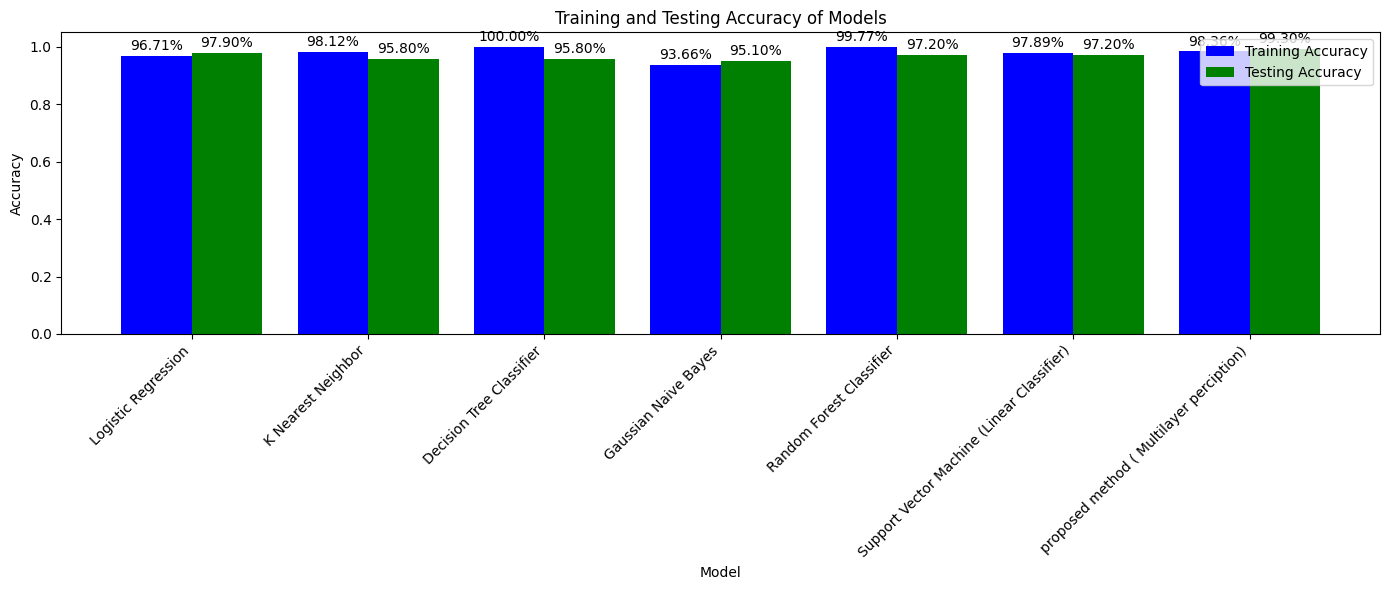

In [ ]:
import matplotlib.pyplot as plt

# Training accuracies
train_accuracies = [0.9671361502347418, 0.9812206572769953, 1.0, 0.9366197183098591, 0.9976525821596244, 0.9788732394366197,0.9836 ]

# Testing accuracies
test_accuracies = [0.9790209790209791,0.958041958041958,0.958041958041958,0.951048951048951, 0.972027972027972,0.972027972027972,0.9930]  # Fill this list with your actual testing accuracies

# Model names
model_names = [
    'Logistic Regression',
    'K Nearest Neighbor',
    'Decision Tree Classifier',
    'Gaussian Naive Bayes',
    'Random Forest Classifier',
    'Support Vector Machine (Linear Classifier)',
    'proposed method ( Multilayer perciption)'
]

# Plotting
plt.figure(figsize=(14, 6))

# Plot training accuracy
bars_train = plt.bar([i - 0.2 for i in range(len(train_accuracies))], train_accuracies, width=0.4, color='blue', label='Training Accuracy')

# Plot testing accuracy
bars_test = plt.bar([i + 0.2 for i in range(len(test_accuracies))], test_accuracies, width=0.4, color='green', label='Testing Accuracy')

# Adding labels and title
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy of Models')
plt.xticks(range(len(model_names)), model_names, rotation=45, ha='right')

# Adding accuracy rate on top of each bar
for bars, accuracies in zip([bars_train, bars_test], [train_accuracies, test_accuracies]):
    for bar, acc in zip(bars, accuracies):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, '{:.2f}%'.format(acc * 100),
                 ha='center', va='bottom')

# Adding legend
plt.legend()

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()
